In [1]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('../house_price.csv')

#displaying few data from the loaded dataset file
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Identifying the missing percentage data
missing_percent_data = (df.isnull().sum() / len(df)) * 100
missing_percent_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [6]:
#Displaying only the columns with missing values
missing_columns = missing_percent_data[missing_percent_data > 0]
missing_columns

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
#Handling the missing values. The approach is 1.How important the column is for our prediction, 2.How much data is missing

#Checking the columns with more than 50% missing values 
high_missing_columns = missing_columns[missing_columns > 50]
high_missing_columns

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [8]:
#Creating a copy of the Data
df_copy = df.copy()

In [9]:
#Dropping the columns with more than 50% missing values as they may not provide much information
df_copy.drop(columns = high_missing_columns.index, inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
#Checking the columns with less than 50% missing values 
low_missing_columns = missing_columns[missing_columns <= 50]
low_missing_columns

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [11]:
#Filling the missing values for the columns less than 50%

#Filling the missing values for numerical columns
df_copy['LotFrontage'] = df_copy['LotFrontage'].fillna(df_copy['LotFrontage'].median())
df_copy['MasVnrArea'] = df_copy['MasVnrArea'].fillna(0)
df_copy['GarageYrBlt'] = df_copy['GarageYrBlt'].fillna(df_copy['GarageYrBlt'].median())

In [12]:
#Filling the missing values for categorical columns
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df_copy[basement_cols] = df_copy[basement_cols].fillna("None")
df_copy[garage_cols] = df[garage_cols].fillna("None")
df_copy['FireplaceQu'] = df_copy['FireplaceQu'].fillna("None")
df_copy['Electrical'] = df_copy['Electrical'].mode()[0]  #only one missing value so filling with the mode

In [13]:
#Checking if there are any missing values
df_copy.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [14]:
df_copy.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

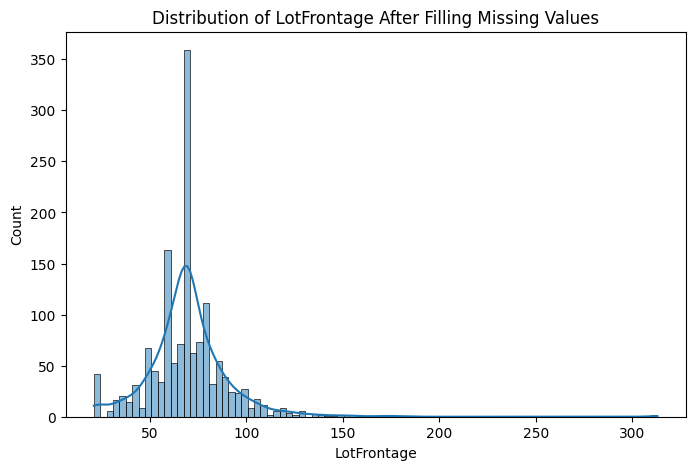

In [15]:
#Ploting to ensure the data looks fine
import matplotlib.pyplot as plt
import seaborn as sns

#Checking LotFrontage after filling missing values
plt.figure(figsize = (8, 5))
sns.histplot(df_copy['LotFrontage'], kde = True)
plt.title("Distribution of LotFrontage After Filling Missing Values")
plt.show()

In [16]:
df_copy['LotFrontage'] = df_copy.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_copy['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [17]:
df_copy['LotFrontage'] = df_copy['LotFrontage'].interpolate(method = 'linear')
df_copy['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

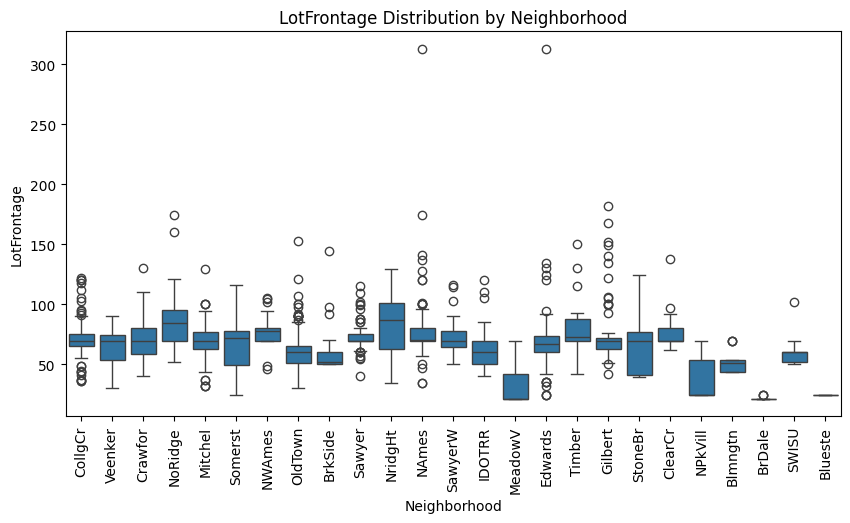

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy['Neighborhood'], y=df_copy['LotFrontage'])
plt.xticks(rotation=90)
plt.title("LotFrontage Distribution by Neighborhood")
plt.show()

In [19]:
#Checking for any remaining missing values
df_copy['LotFrontage'].isnull().sum()

np.int64(0)

In [21]:
#Analyzing the outliers
Q1 = df_copy['LotFrontage'].quantile(0.25)
Q3 = df_copy['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1

#Defining outliers boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Count Outliers
outliers = df_copy[(df_copy['LotFrontage'] < lower_bound) | (df_copy['LotFrontage'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

Number of Outliers: 106


In [22]:
df_copy = df_copy[(df_copy['LotFrontage'] >= lower_bound) & (df_copy['LotFrontage'] <= upper_bound)]
df_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [23]:
df_copy.shape

(1354, 76)

In [25]:
df_copy.isnull().sum().sum()


np.int64(0)

In [26]:
df_copy['LotFrontage'].describe()

count    1354.000000
mean       68.777696
std        14.378170
min        32.000000
25%        60.000000
50%        69.000000
75%        77.000000
max       107.000000
Name: LotFrontage, dtype: float64

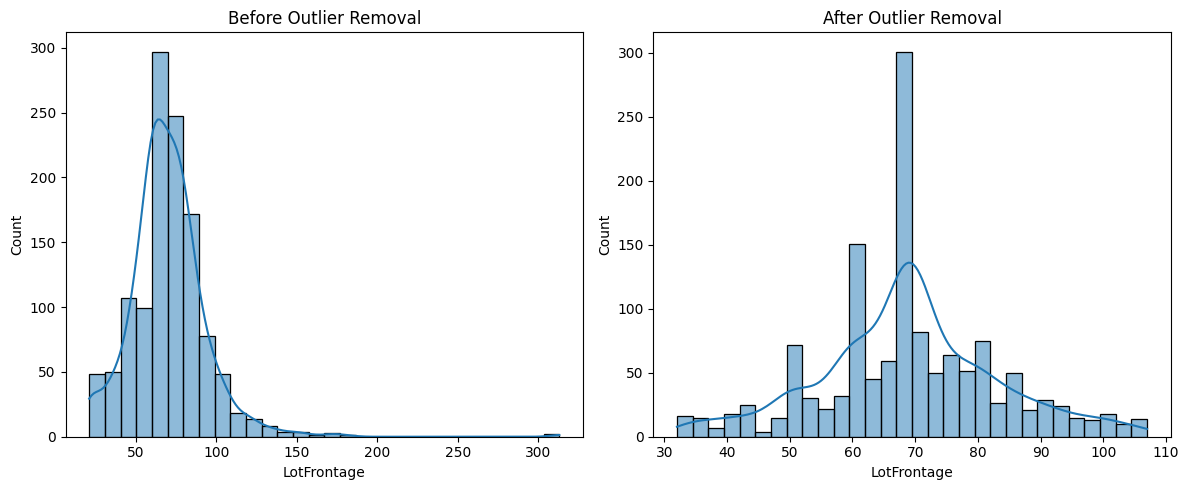

In [32]:
plt.figure(figsize=(12, 5))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(df['LotFrontage'], bins=30, kde=True)
plt.title("Before Outlier Removal")

# After removing outliers
plt.subplot(1, 2, 2)
sns.histplot(df_copy['LotFrontage'], bins=30, kde=True)
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

In [33]:
#Saving the cleaned dataset before moving further
df_copy.to_csv("cleaned_data.csv", index = False)

In [34]:
#Change in dataset after removal of the outlier
print(f"Original dataset shape: {df.shape}")
print(f"After outlier removal: {df_copy.shape}")

Original dataset shape: (1460, 81)
After outlier removal: (1354, 76)
